# Fetal AI

importing the necessary Libraries

In [10]:
import numpy as np
import pandas as pd

In [11]:
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings(action='ignore')

importing the dataset


In [12]:
data=pd.read_csv('fetal_health.csv')

In [13]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [14]:
data.shape

(2126, 22)

checking what are the data types present in the dataset

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

checking for null values


In [16]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

it is clear that there are a lot of parameters, thus we are going to do data visualization to find what all columns can be eliminated with negligile effect on the prediction model.

In [17]:
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

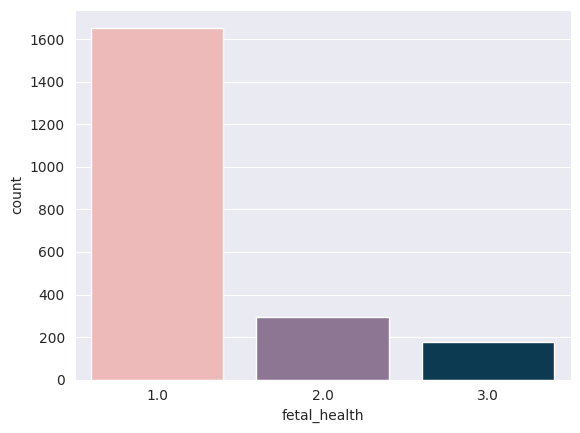

In [18]:
colours=["#f7b2b0", "#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health", palette=colours)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [20]:
data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

histogram visualization

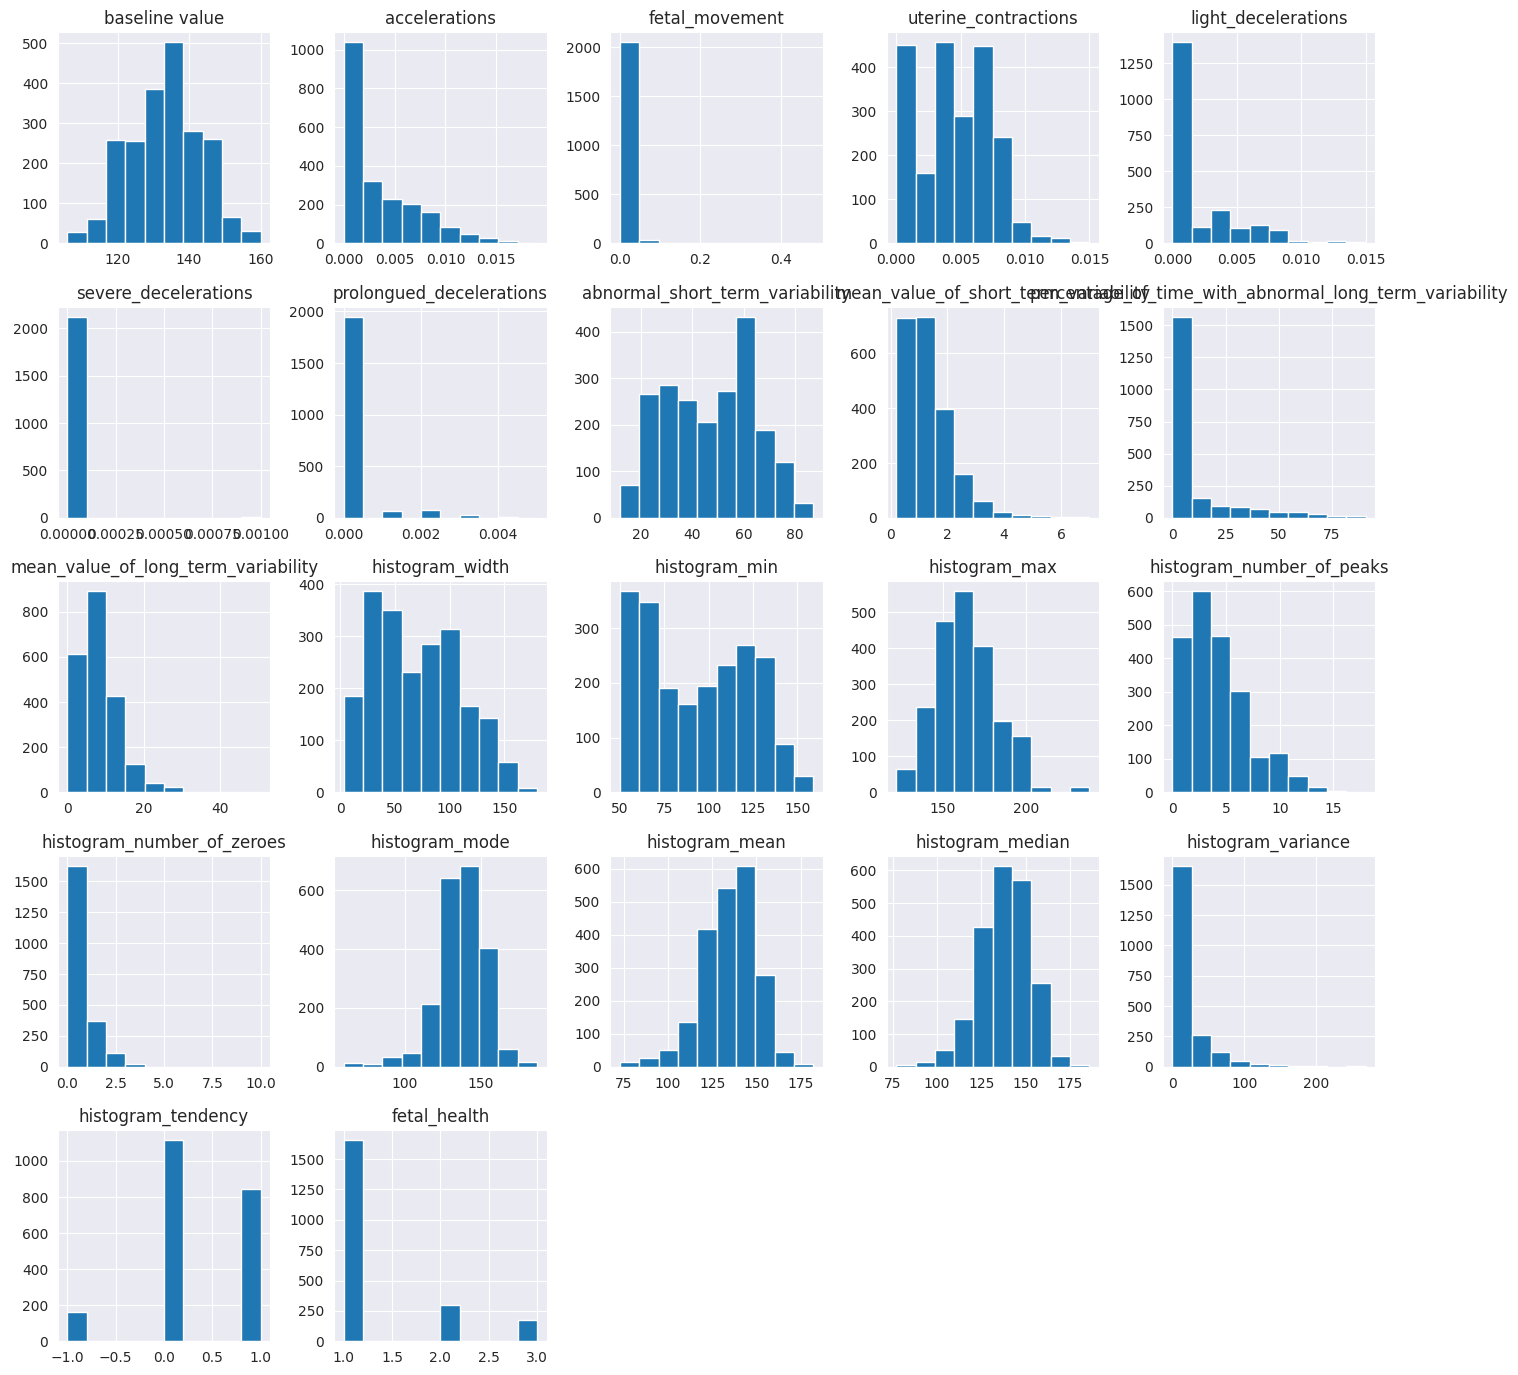

In [21]:
data.hist(figsize=(17,17), layout=(5,5), sharex=False);

box plot visualization

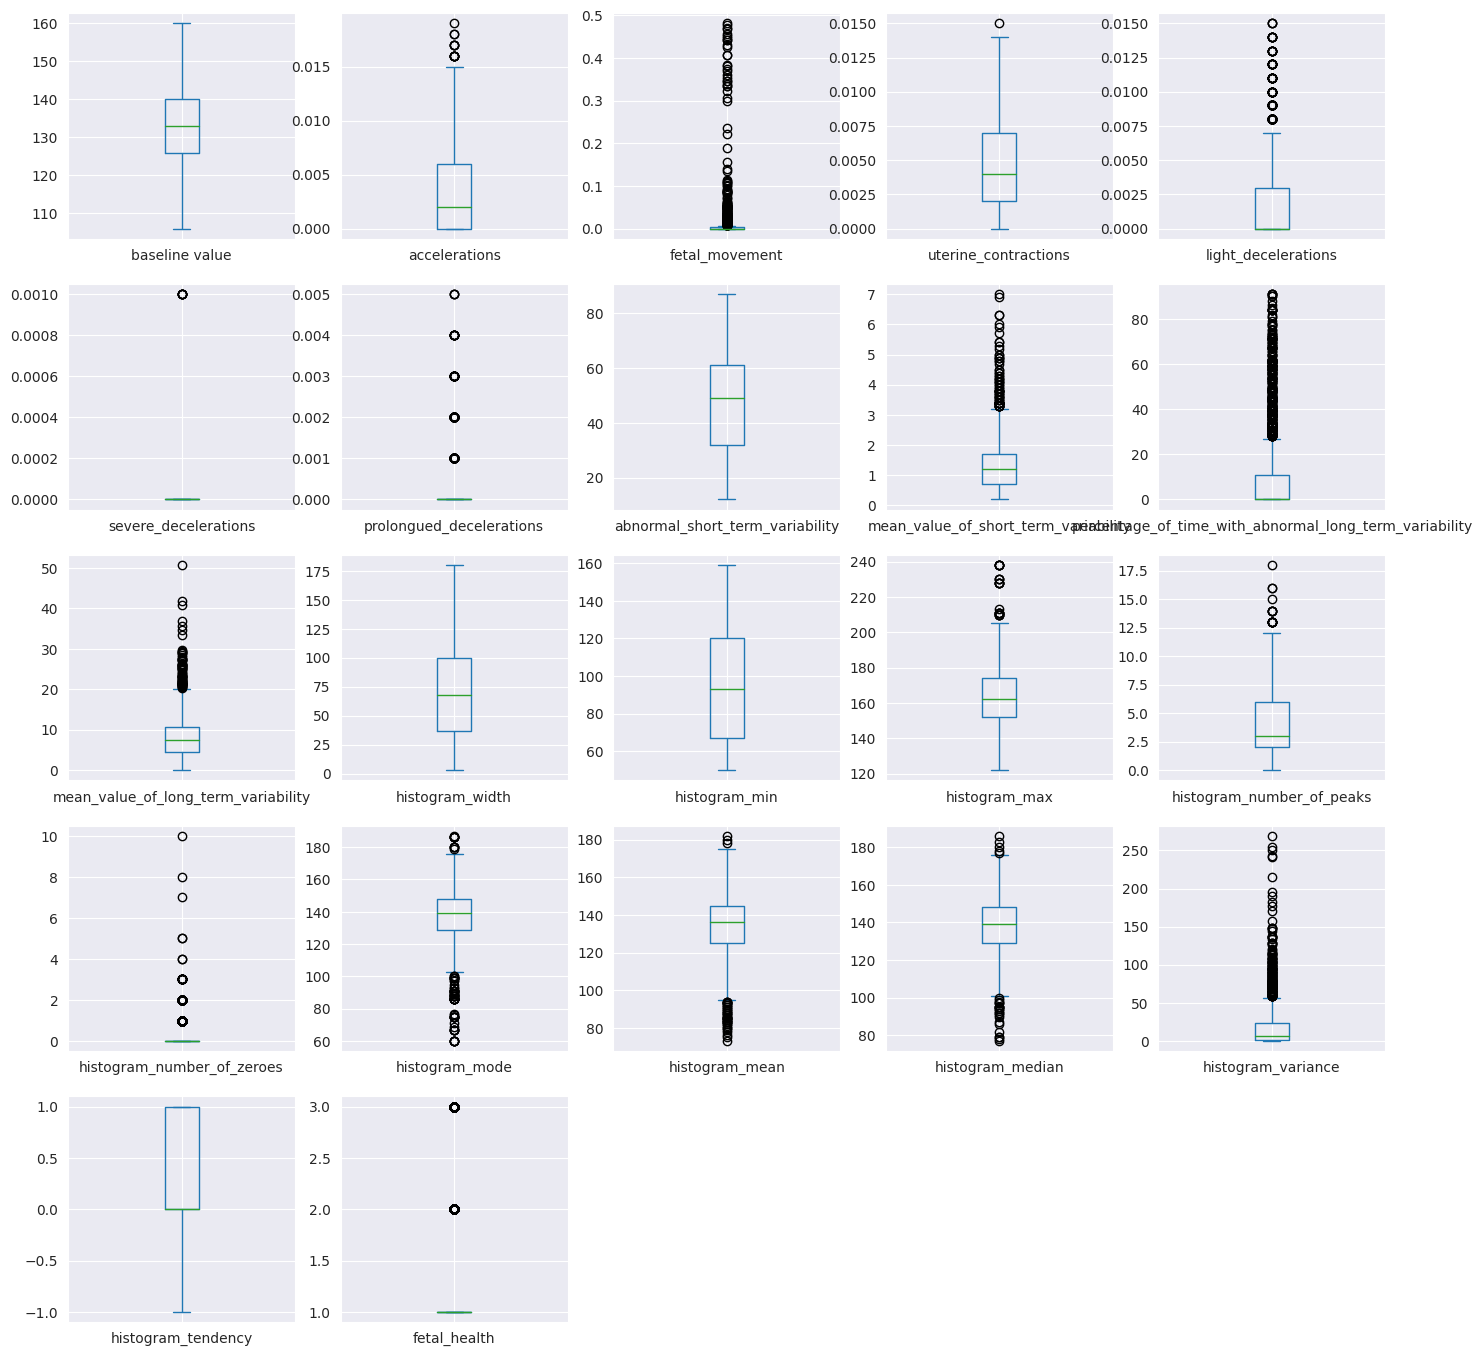

In [22]:
data.plot(kind='box',figsize=(17,17),layout=(5,5),sharex=False,subplots=True);

scatter plot visualization

<Axes: xlabel='fetal_movement', ylabel='fetal_health'>

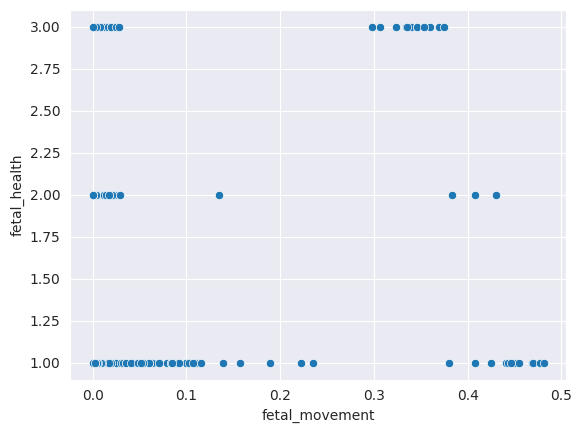

In [23]:
sns.scatterplot(data=data, x='fetal_movement', y='fetal_health')

the conventional correlation checking with heatmap.

used to find correlations greater than 0.75 and eliminate those columns.

<Axes: >

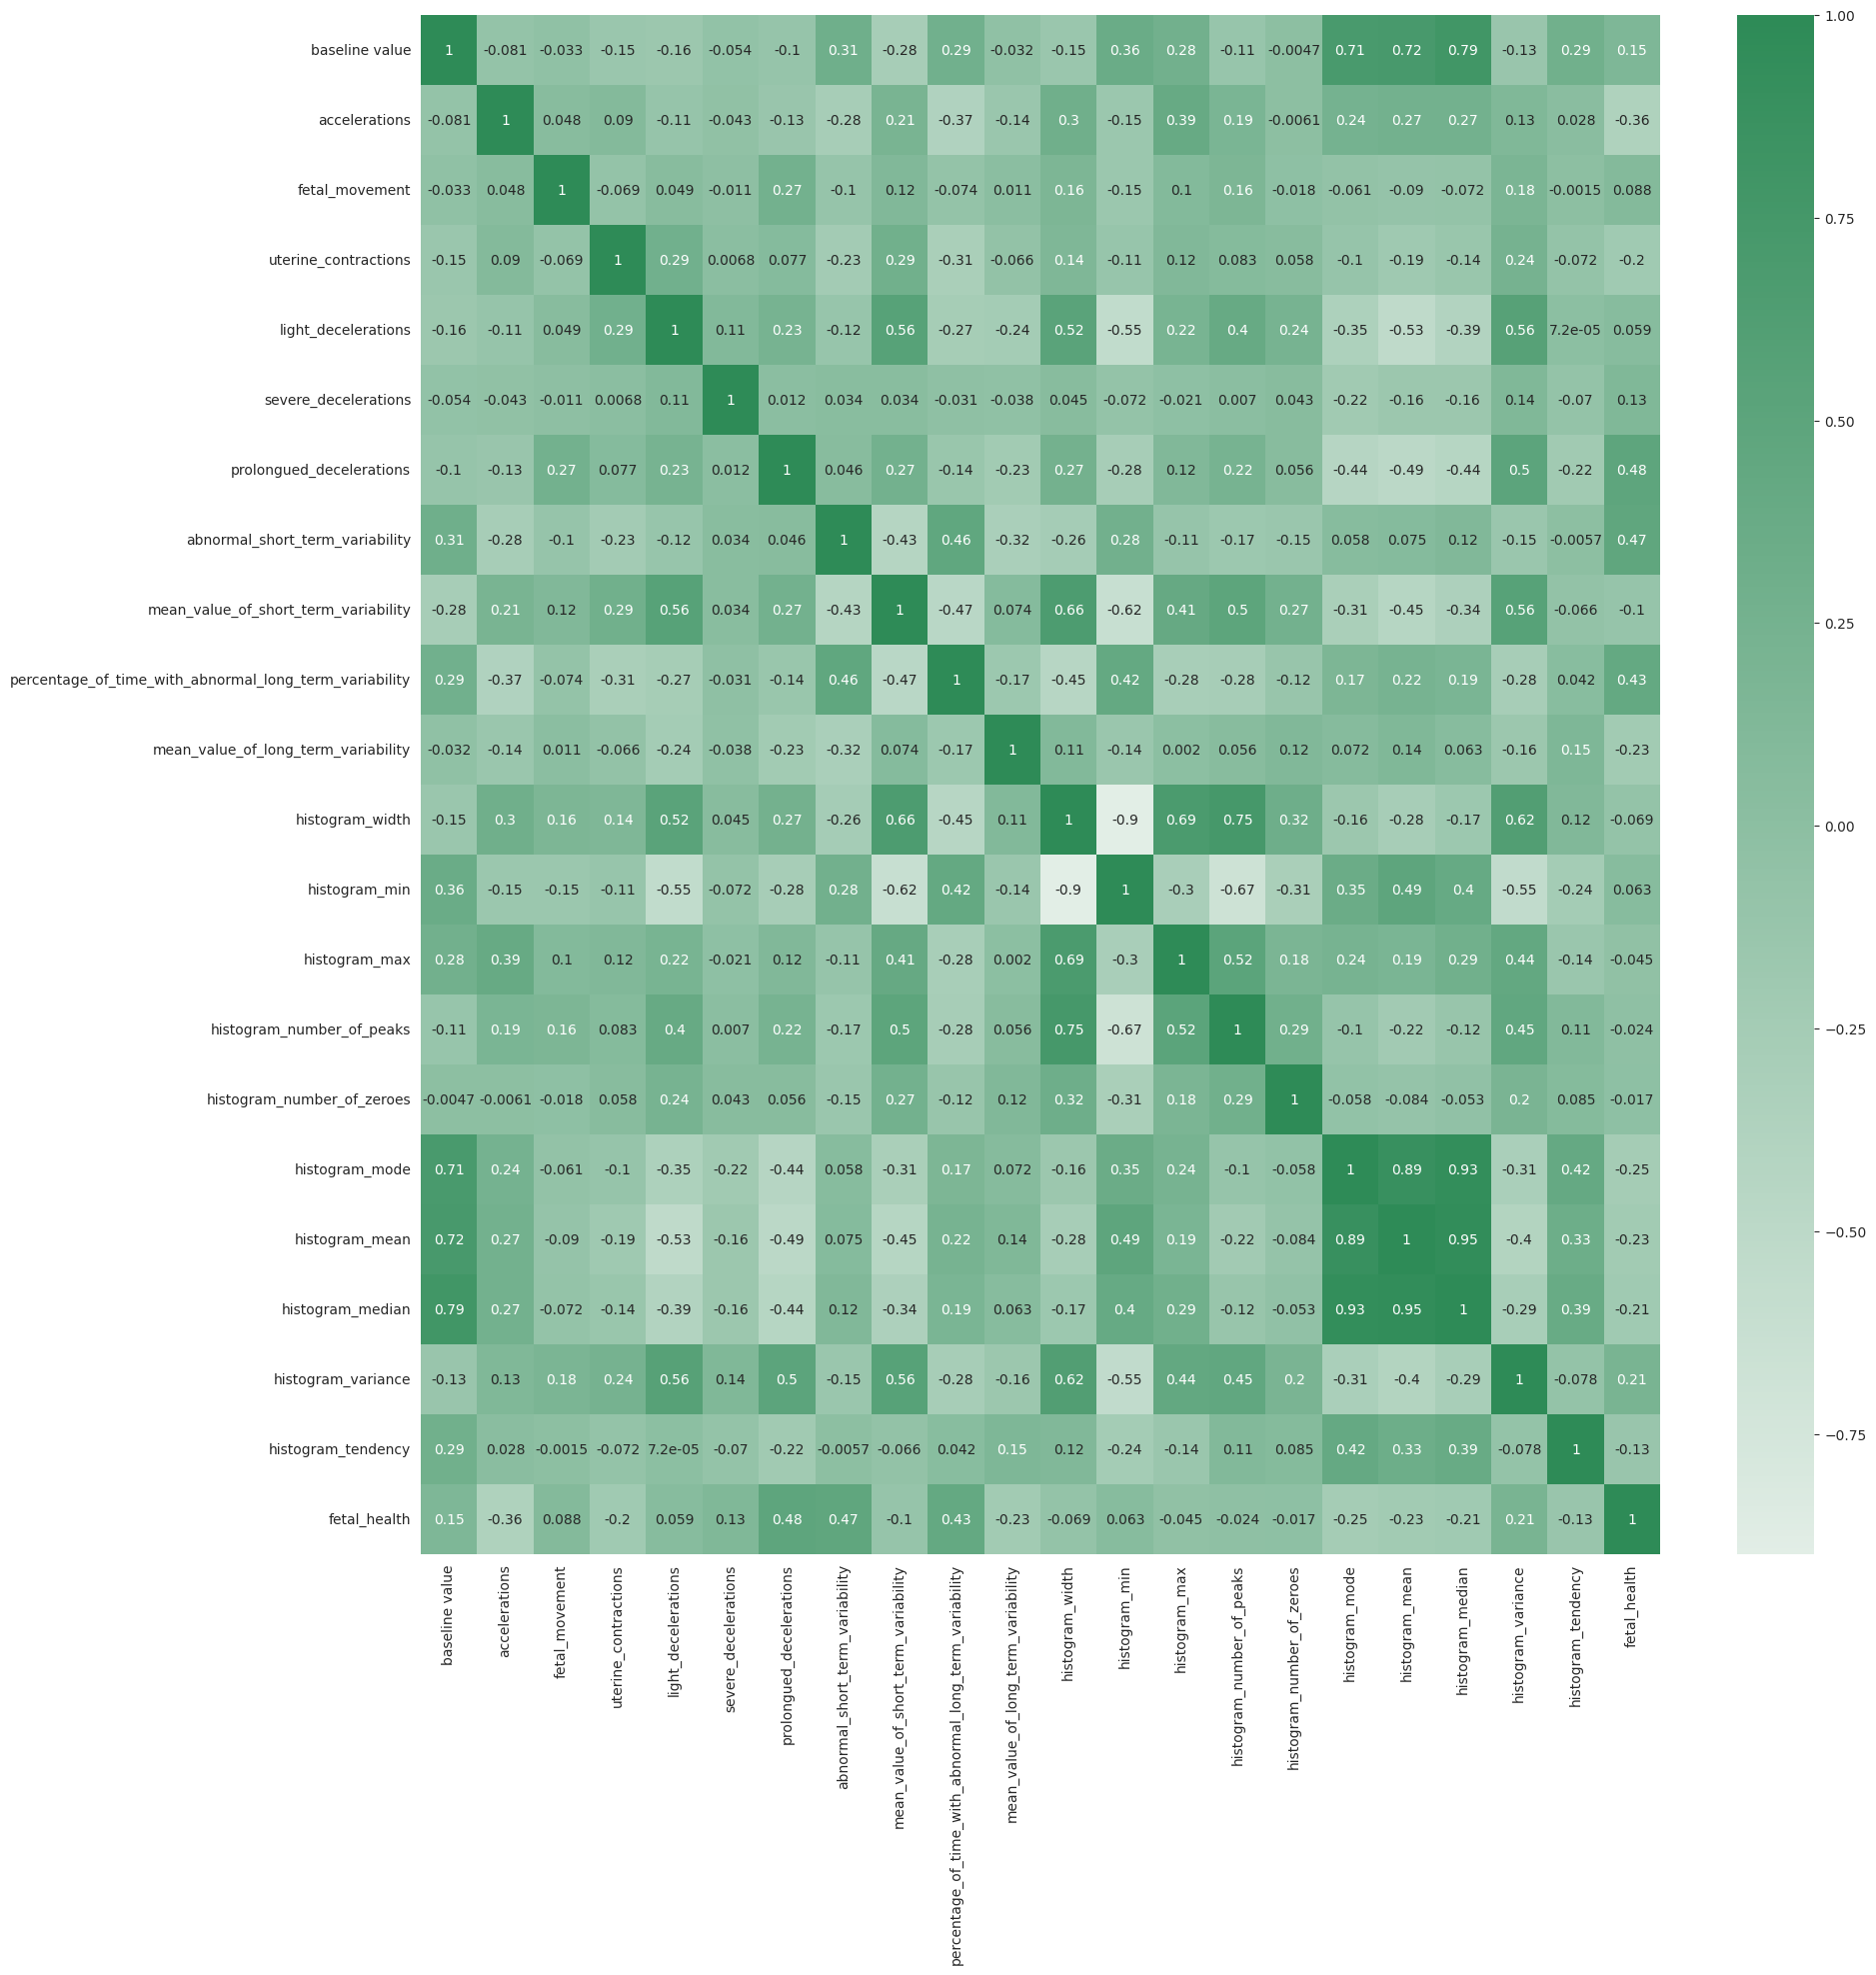

In [24]:
corrmat=data.corr()
plt.figure(figsize=(20,20))
cmap=sns.light_palette("seagreen",as_cmap=True)
sns.heatmap(corrmat,annot=True,cmap=cmap,center=0)

In [25]:
X=data.drop(columns=['baseline value','histogram_mode','histogram_mean'])

In [26]:
X=X.drop(columns=['histogram_min','histogram_number_of_peaks'])

In [27]:
data.corr()["fetal_health"].sort_values (ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [28]:
X.shape

(2126, 17)

In [29]:
X= X.drop(columns=['fetal_health'])
y= data["fetal_health"]
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
x_scaled.head()

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_zeroes,histogram_median,histogram_variance,histogram_tendency
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,0.047337,0.344633,0.034483,0.0,0.403670,0.271375,1.0
1,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,0.205128,0.717514,0.655172,0.1,0.577982,0.044610,0.5
2,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,0.264300,0.717514,0.655172,0.1,0.559633,0.048327,0.5
3,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,0.453649,0.644068,0.413793,0.0,0.550459,0.048327,1.0
4,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,0.392505,0.644068,0.413793,0.0,0.559633,0.040892,1.0


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [32]:
max_acc_gb = 0
while True:
    scores_gb = list()
    print("Now we have", X.shape[1], "columns")
    for i in range(X.shape[1]):
        temp = X.drop(X.columns[i], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(temp, y, test_size=0.3, random_state=42)
        gb_model = GradientBoostingClassifier()
        gb_model.fit(X_train,y_train)
        y_pred = gb_model.predict(X_test)
        scores_gb.append(accuracy_score(y_test, y_pred))
    deleter = scores_gb.index(max(scores_gb))
    now_max_gb = max(scores_gb)

    if now_max_gb >= max_acc_gb:
        max_acc_gb = now_max_gb
        print(round(100 * max(scores_gb), 3), "by deleting", X.columns[deleter])
        X.drop(X.columns[deleter], axis=1, inplace=True)
    else:
        break

print("Remaining columns:",X.columns)

Now we have 16 columns
95.611 by deleting mean_value_of_long_term_variability
Now we have 15 columns
96.082 by deleting histogram_variance
Now we have 14 columns
96.082 by deleting severe_decelerations
Now we have 13 columns
Remaining columns: Index(['accelerations', 'fetal_movement', 'uterine_contractions',
       'light_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_width', 'histogram_max', 'histogram_number_of_zeroes',
       'histogram_median', 'histogram_tendency'],
      dtype='object')


In [33]:
max_acc_gb = 0
while True:
    scores_gb = list()
    print("Now we have", X.shape[1], "columns")
    for i in range(X.shape[1]):
        temp = X.drop(X.columns[i], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(temp, y, test_size=0.3, random_state=42)
        gb_model = GradientBoostingClassifier()
        gb_model.fit(X_train,y_train)
        y_pred = gb_model.predict(X_test)
        scores_gb.append(accuracy_score(y_test, y_pred))
    deleter = scores_gb.index(max(scores_gb))
    now_max_gb = max(scores_gb)

    if now_max_gb >= max_acc_gb:
        max_acc_gb = now_max_gb
        print(round(100 * max(scores_gb), 3), "by deleting", X.columns[deleter])
        X.drop(X.columns[deleter], axis=1, inplace=True)
    else:
        break

print("Remaining columns:",X.columns)

Now we have 13 columns
95.611 by deleting prolongued_decelerations
Now we have 12 columns
Remaining columns: Index(['accelerations', 'fetal_movement', 'uterine_contractions',
       'light_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_width', 'histogram_max', 'histogram_number_of_zeroes',
       'histogram_median', 'histogram_tendency'],
      dtype='object')


In [34]:
max_acc_gb = 0
while True:
    scores_gb = list()
    print("Now we have", X.shape[1], "columns")
    for i in range(X.shape[1]):
        temp = X.drop(X.columns[i], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(temp, y, test_size=0.3, random_state=42)
        gb_model = GradientBoostingClassifier()
        gb_model.fit(X_train,y_train)
        y_pred = gb_model.predict(X_test)
        scores_gb.append(accuracy_score(y_test, y_pred))
    deleter = scores_gb.index(max(scores_gb))
    now_max_gb = max(scores_gb)

    if now_max_gb >= max_acc_gb:
        max_acc_gb = now_max_gb
        print(round(100 * max(scores_gb), 3), "by deleting", X.columns[deleter])
        X.drop(X.columns[deleter], axis=1, inplace=True)
    else:
        break

print("Remaining columns:",X.columns)

Now we have 12 columns
95.611 by deleting histogram_width
Now we have 11 columns
Remaining columns: Index(['accelerations', 'fetal_movement', 'uterine_contractions',
       'light_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_max', 'histogram_number_of_zeroes', 'histogram_median',
       'histogram_tendency'],
      dtype='object')


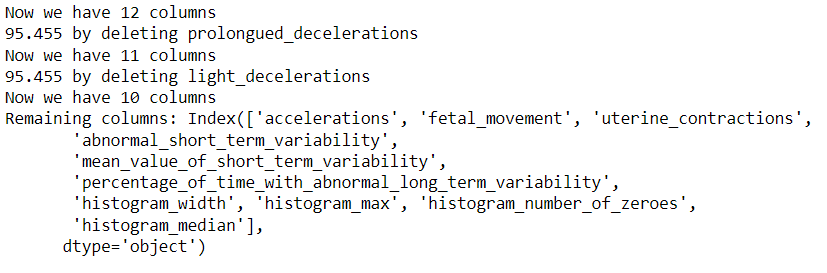

### Now, we have 10 parameters and the accuracy of the model is 95%.

In [35]:
X = data[['accelerations','light_decelerations','fetal_movement','uterine_contractions','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','histogram_max','histogram_median','histogram_number_of_zeroes']]


In [36]:
X.shape

(2126, 10)

In the above cell we included only the above result columns in to the X.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
y_pred = gb_model.predict(X_test)
scores_gb.append(accuracy_score(y_test, y_pred))

In [38]:
X_train.shape,X_test.shape

((1488, 10), (638, 10))

In [39]:
# from imblearn.over_sampling import SMOTE
smote=SMOTE()
from sklearn.utils import resample

In [40]:
X_train_smote,y_train_smote=smote.fit_resample(X_train.astype('float'),y_train)

In [41]:
from collections import Counter
print("Before SMOTE:",Counter(y_train))
print("After SMOTE: ",Counter(y_train_smote))

Before SMOTE: Counter({1.0: 1159, 2.0: 194, 3.0: 135})
After SMOTE:  Counter({1.0: 1159, 3.0: 1159, 2.0: 1159})


For the amounts of training data is:  (2126, 10)
Accuracy of Gradient Boosting:  95.768


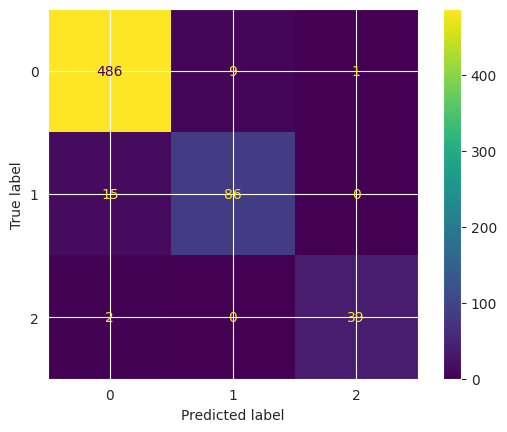

In [42]:
print("For the amounts of training data is: ",X.shape)
print("Accuracy of Gradient Boosting: ",round(100 *accuracy_score(y_test, y_pred), 3))
cm=confusion_matrix(y_test,y_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

Above is the confusion matrix.

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))
print("RMAE :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R^2 :",r2_score(y_test,y_pred))

MAE : 0.047021943573667714
MSE : 0.05642633228840126
RMAE : 0.23754227473946876
R^2 : 0.8305957324403862


Evaluating the model on test set

In [46]:
y_temp=gb_model.predict(X_test)
print("MAE on test set :",mean_absolute_error(y_temp,y_pred))
print("MSE on test set :",mean_squared_error(y_temp,y_pred))
print("RMAE on test set :",np.sqrt(mean_squared_error(y_temp,y_pred)))
print("R^2 on test set :",r2_score(y_temp,y_pred))

MAE on test set : 0.0
MSE on test set : 0.0
RMAE on test set : 0.0
R^2 on test set : 1.0


In [44]:
import pickle
pickle.dump(gb_model,open('fetalai_final.pkl','wb'))

The model is ready and exported into the the .pkl format.